In [1]:
import keras
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [9]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [26]:
# you can't feed lists of integers into a neural network. You have to turn your lists into 
# tensors.

# lets vectorize the data

import numpy as np
def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension), dtype = np.int)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_text = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0, 1, 1, ..., 0, 0, 0])

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
y_test

array([ 0.,  1.,  1., ...,  0.,  0.,  0.], dtype=float32)

In [32]:
# building your network
# the input data is vector, and the labels are scalers (1s and 0s)
# a type of network that performs well on such a problem is a simple stack of fully connected
# (Dense) layers with relu activatioins: Dense (16, activation = 'relu')

# The argument being passed to each dense layer (16) is the number of hidden unit of the
# layer. A hidden unit is a dimension in the representation space of the layer.

In [33]:
# the model defination
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [34]:
# A relu (rectified linear unit) is a function meant to zero out negative values whereas
# a sigmoid "squashes" arbitrary values into the [0,1] interval, outputing something that can
# be interpreted as a probability.

In [35]:
# compiling the model
# we will have to use a loss function and an optimizer. Because it is a binary classification
# problem and the output of your network is a probability (you end your network with a single-unit
# layer with a sigmoid activation).
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
# configuring the optimizer
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
# using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])


In [38]:
# validating your approach
# Setting aside a validation set


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

# you'll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors)
#  in mini-batches of 512 samples

# training your model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 1024/15000 [=>............................] - ETA: 33:09 - loss: 0.6917 - acc: 0.5342

C:\Users\ACER\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126251). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 1160s 77ms/step - loss: 0.5103 - acc: 0.7787 - val_loss: 0.3834 - val_acc: 0.8659
Epoch 2/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.3013 - acc: 0.9042 - val_loss: 0.2995 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.2161 - acc: 0.9289 - val_loss: 0.3073 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.1728 - acc: 0.9435 - val_loss: 0.2834 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 5s 312us/step - loss: 0.1396 - acc: 0.9555 - val_loss: 0.2855 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 5s 306us/step - loss: 0.1118 - acc: 0.9661 - val_loss: 0.3160 - val_acc: 0.8786
Epoch 7/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.0947 - acc: 0.9723 - val_loss: 0.3161 - val_acc: 0.8845
Epoch 8/20
15000/15000 [===================

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

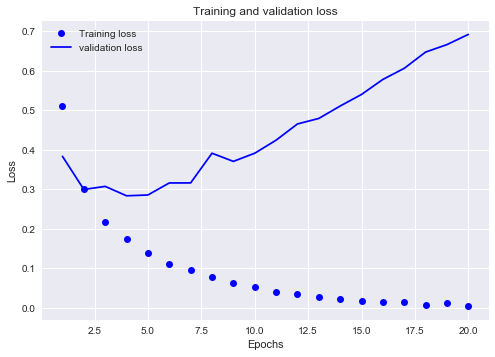

In [43]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

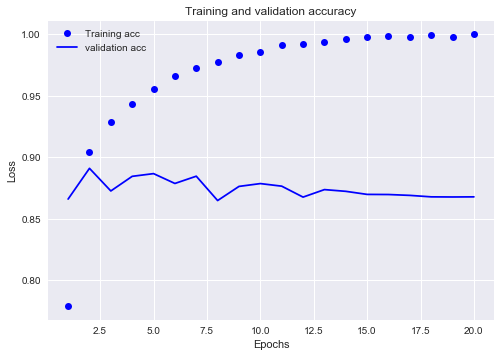

In [46]:
# plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'], 'bo', label = 'Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
# training a new network from scratch using 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_text, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 7s 290us/step - loss: 0.4579 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 6s 229us/step - loss: 0.2627 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 6s 248us/step - loss: 0.2004 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 642s 26ms/step


[0.2965703438282013, 0.88307999999999998]

In [52]:
# using a trained network to generate predictions on new data
y_pred = model.predict(x_text)
import sklearn


In [56]:
y_pred[y_pred >= 0.5] =1
y_pred[y_pred < 0.5] = 0

In [58]:
from sklearn.metrics import accuracy_score
value = accuracy_score(y_pred, y_test)

In [59]:
value

0.88307999999999998